# Импорт библиотек

Стандартные библиотеки

In [1]:
import sys
import os
from tqdm import tqdm
from math import radians

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Частные библиотеки

In [2]:
from airfoil import Airfoil

# Моделирование профиля 

## BMSTU

In [35]:
airfoil_bmstu = Airfoil('BMSTU', 30)

Определение характеристик профиля необходимых для построения

In [36]:
airfoil_bmstu.xg_b = 0.4

airfoil_bmstu.r_inlet_b = 0.06
airfoil_bmstu.r_outlet_b = 0.03

airfoil_bmstu.g_ = 0.5

airfoil_bmstu.g_inlet = radians(20)
airfoil_bmstu.g_outlet = radians(10)

airfoil_bmstu.e = radians(110)

Определение точек профиля

In [37]:
airfoil_bmstu.solve()

"solve" elapsed 0.0009 seconds


ValueError: Expect x to not have duplicates

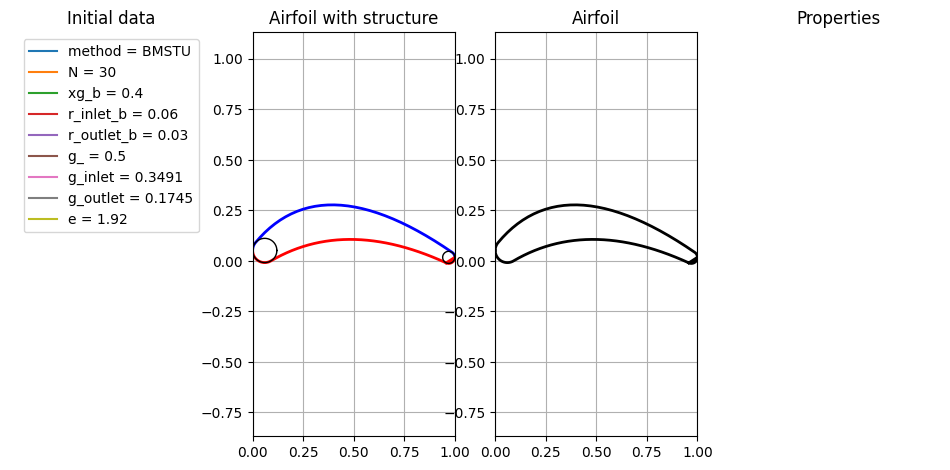

In [38]:
airfoil_bmstu.show()

## NACA

In [7]:
airfoil_naca = Airfoil('NACA')

Определение характеристик профиля необходимых для построения

In [8]:
airfoil_naca.c_b = 0.24
airfoil_naca.f_b = 0.05
airfoil_naca.xf_b = 0.3

In [9]:
airfoil_naca.solve()

"solve" elapsed 0.0022 seconds


"properties" elapsed 0.4916 seconds


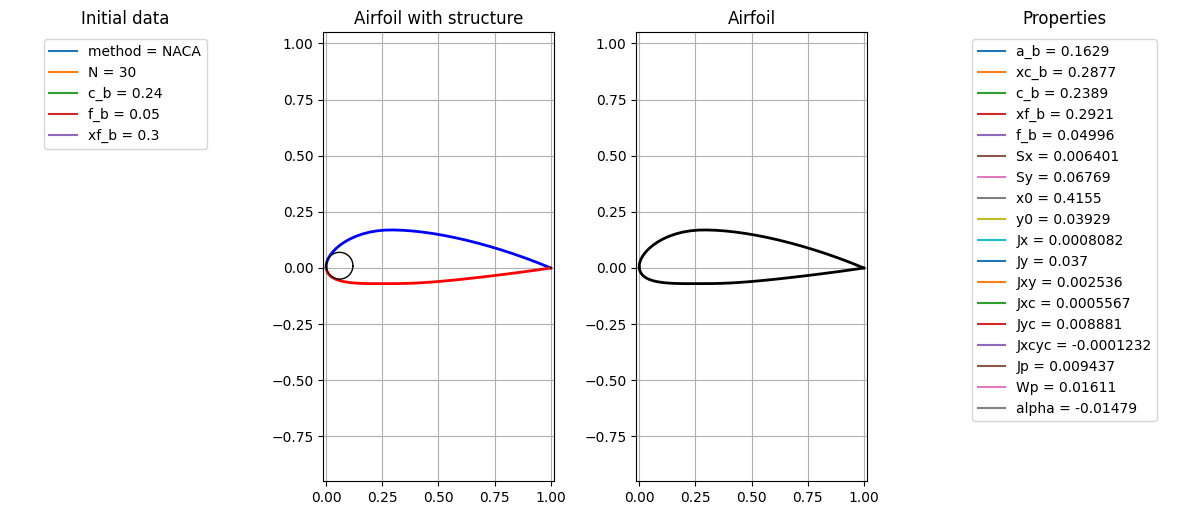

In [10]:
airfoil_naca.show()

## MYNK

In [14]:
airfoil_mynk = Airfoil('MYNK', 20)

In [15]:
airfoil_mynk.h = 0.1

In [17]:
airfoil_mynk.solve()

"solve" elapsed 0.0016 seconds


"properties" elapsed 0.5787 seconds


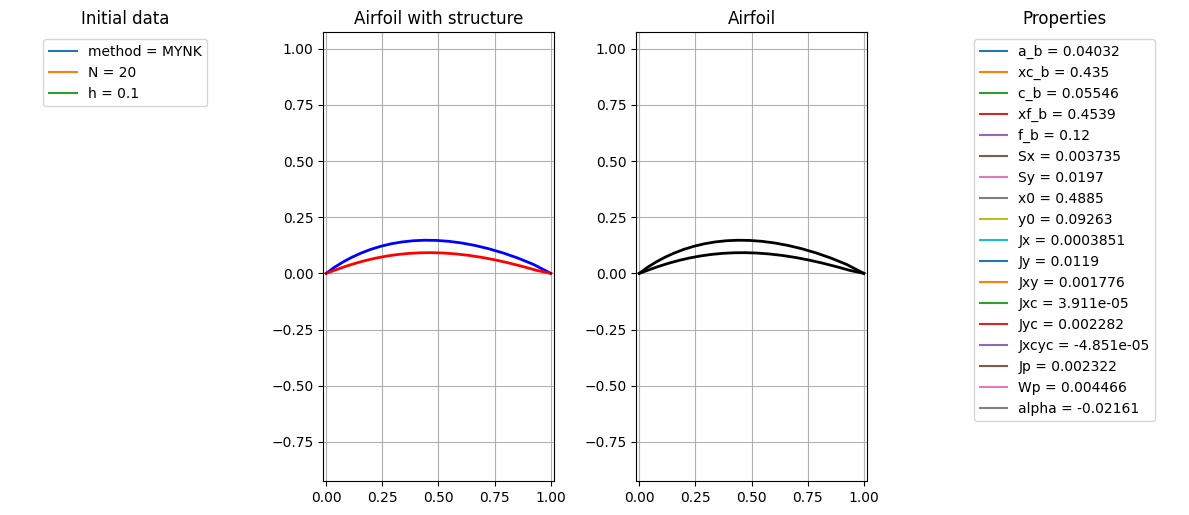

In [18]:
airfoil_mynk.show()

## PARSEC

In [19]:
airfoil_parsec = Airfoil('PARSEC', 100)

In [20]:
airfoil_parsec.r_inlet_b = 0.01
airfoil_parsec.f_b_u, airfoil_parsec.f_b_l = (0.35, 0.055), (0.45, -0.006)
airfoil_parsec.d2y_dx2_u, airfoil_parsec.d2y_dx2_l = -0.35, -0.2
airfoil_parsec.theta_outlet_u, airfoil_parsec.theta_outlet_l = radians(-6), radians(0.05)

In [21]:
airfoil_parsec.solve()

"solve" elapsed 0.0032 seconds


"properties" elapsed 0.5276 seconds


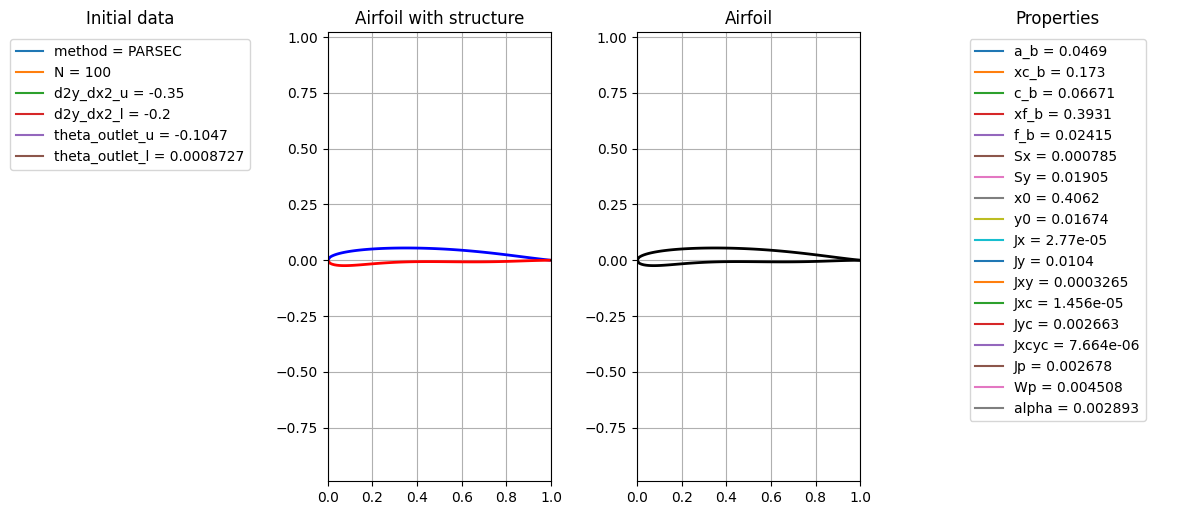

In [22]:
airfoil_parsec.show()

In [11]:
print(os.listdir())

['airfoil.py', 'curves.py', 'exports', '.git', '.gitignore', 'airfoil_fluid_flow.ipynb', 'venv', '.idea', '__pycache__']


In [12]:
file_name = 'airfoil.xlsx'
df = pd.read_excel(file_name)
df

FileNotFoundError: [Errno 2] No such file or directory: 'airfoil.xlsx'

# Обтекание профиля

In [ ]:
dct = df.to_dict('list')
for k, v in dct.items(): print(f'{k}: {v}')

xu: [0.0, 2.689674082168247e-05, 0.0001075628487978375, 0.0002419260020818137, 0.0004298657363099534, 0.0006712135526048724, 0.000965753068644477, 0.001313220212661275, 0.001713303460198048, 0.002165644113407585, 0.002669836622646147, 0.00322542895007222, 0.0038319229749247, 0.004488774940117035, 0.00519539593974703, 0.005951152447085139, 0.006755366882567961, 0.007607318221287622, 0.008506242639432449, 0.009451334199099333, 0.01044174557086384, 0.03970886327679913, 0.07142801287848458, 0.1055991943759201, 0.1422224077691059, 0.1812976530580418, 0.2228249302427278, 0.266804239323164, 0.3132355802993504, 0.3621189531712868, 0.4134543579389734, 0.4672417946024103, 0.5234812631615973, 0.5821727636165343, 0.6433162959672215, 0.706911860213659, 0.7729594563558465, 0.8414590843937841, 0.912410744327472, 0.9858144361569101, 0.9870879849638522, 0.9883174838671699, 0.9894997634289034, 0.9906317759344826, 0.9917106032492135, 0.9927334643407308, 0.993697722448024, 0.9946008918785562, 0.9954406444

In [ ]:
x = dct['xu'][::-1] + dct['xd']
y = dct['yu'][::-1] + dct['yd']
print(f'x: {x}')
print(f'y: {y}')

x: [1.0, 0.9999613325646198, 0.9998454299365166, 0.9996525908928492, 0.9993833125397015, 0.9990382890306283, 0.9986184097772455, 0.9981247571564799, 0.9975586037203854, 0.9969214089157226, 0.9962148153217537, 0.9954406444159544, 0.9946008918785562, 0.993697722448024, 0.9927334643407308, 0.9917106032492135, 0.9906317759344826, 0.9894997634289034, 0.9883174838671699, 0.9870879849638522, 0.9858144361569101, 0.912410744327472, 0.8414590843937841, 0.7729594563558465, 0.706911860213659, 0.6433162959672215, 0.5821727636165343, 0.5234812631615973, 0.4672417946024103, 0.4134543579389734, 0.3621189531712868, 0.3132355802993504, 0.266804239323164, 0.2228249302427278, 0.1812976530580418, 0.1422224077691059, 0.1055991943759201, 0.07142801287848458, 0.03970886327679913, 0.01044174557086384, 0.009451334199099333, 0.008506242639432449, 0.007607318221287622, 0.006755366882567961, 0.005951152447085139, 0.00519539593974703, 0.004488774940117035, 0.0038319229749247, 0.00322542895007222, 0.0026698366226461

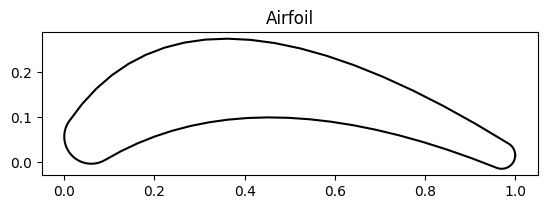

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect(1)
plt.title('Airfoil')
plt.plot(x, y, color=(0, 0, 0))
plt.show()

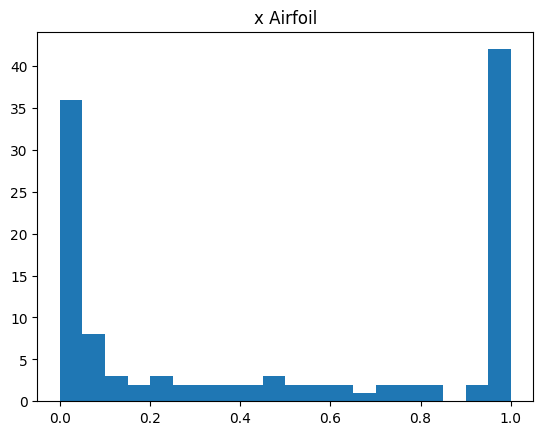

In [ ]:
plt.title('x Airfoil')
plt.hist(x, bins=20)
plt.show()

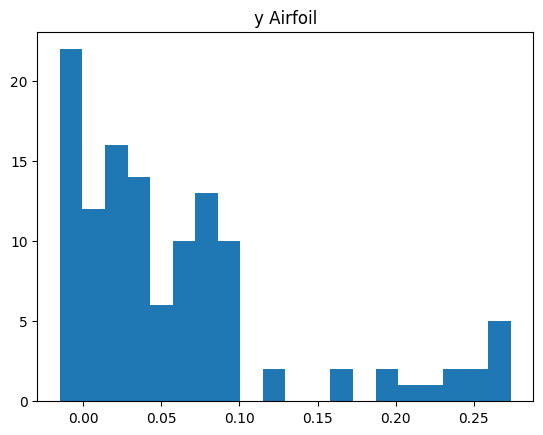

In [ ]:
plt.title('y Airfoil')
plt.hist(y, bins=20)
plt.show()

In [ ]:
def get_panel_centers(x, y):
    xc = (x[1:] + x[:-1]) / 2
    yc = (y[1:] + y[:-1]) / 2
    return xc, yc

In [ ]:
def get_panel_normals(x, y):
    tx = x[1:] - x[:-1]
    ty = y[1:] - y[:-1]

    l = np.sqrt(tx**2 + ty**2)

    tx = tx / l
    ty = ty / l

    nx, ny = ty, -tx
    return nx, ny


In [ ]:
x, y = np.array(x), np.array(y)
xc, yc = get_panel_centers(x, y)
nx, ny = get_panel_normals(x, y)

C:\Users\parkh\AppData\Local\Temp\ipykernel_8616\3613793344.py:7: RuntimeWarning: invalid value encountered in divide
  tx = tx / l
C:\Users\parkh\AppData\Local\Temp\ipykernel_8616\3613793344.py:8: RuntimeWarning: invalid value encountered in divide
  ty = ty / l


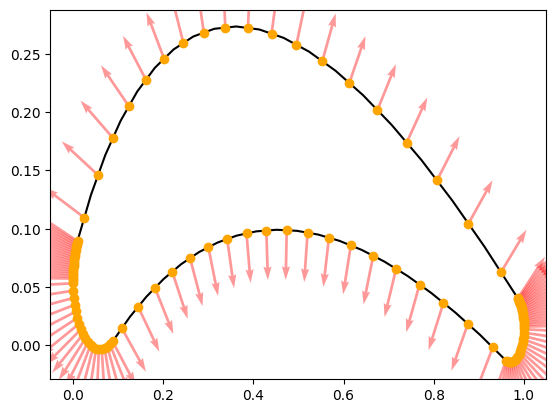

In [ ]:
plt.plot(x,y,color='black')
plt.plot(xc, yc, 'o', color='orange')
plt.quiver(xc,yc, 
           nx,ny,
           color='red',
           scale=10,
           alpha=0.4)

In [ ]:
dis = 50
x_box_lim = (-0.2, 1.2)
y_box_lim = (-0.5, 0.5)

In [ ]:
X, Y = np.meshgrid(np.linspace(*x_box_lim,dis), np.linspace(*y_box_lim,dis))

In [ ]:
ux = np.ones_like(X) * 10
uy = np.ones_like(Y)

In [ ]:
vortex_x = [0.0, 0.6, 0.9]
vortex_y = [0.0, 0.0, 0.0]
vortex_i = [1.0, 1.0, 1.0]

In [ ]:
for i, j, k in zip(vortex_x, vortex_y, vortex_i):
    R = ((X-i)**2+(Y-j)**2)
    vx = -k*(Y-j)/R
    vy = k*(X-i)/R

    ux +=vx
    uy +=vy

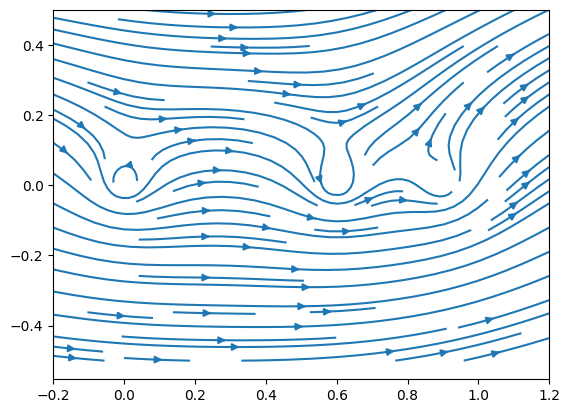

In [ ]:
plt.streamplot(X,Y, ux, uy)
plt.show()

In [ ]:
X, Y = xc, yc

In [ ]:
ux = np.ones_like(X) * 20
uy = np.ones_like(Y)

In [ ]:
vortex_x = x
vortex_y = y
#vortex_i = np.ones_like(x)
vortex_i = np.random.randn(len(x))/3

In [ ]:
for i, j, k in zip(vortex_x, vortex_y, vortex_i):
    R = ((X-i)**2+(Y-j)**2)
    vx = -k*(Y-j)/R
    vy = k*(X-i)/R

    ux +=vx
    uy +=vy

C:\Users\parkh\AppData\Local\Temp\ipykernel_8616\3910596312.py:3: RuntimeWarning: invalid value encountered in divide
  vx = -k*(Y-j)/R
C:\Users\parkh\AppData\Local\Temp\ipykernel_8616\3910596312.py:4: RuntimeWarning: invalid value encountered in divide
  vy = k*(X-i)/R


In [ ]:
projection = nx*ux + ny*uy

In [ ]:
X, Y = np.meshgrid(np.linspace(*x_box_lim,dis), np.linspace(*y_box_lim,dis))

In [ ]:
ux = np.ones_like(X) * 20
uy = np.ones_like(Y)

In [ ]:
for i, j, k in zip(vortex_x, vortex_y, vortex_i):
    R = ((X-i)**2+(Y-j)**2)
    vx = -k*(Y-j)/R
    vy = k*(X-i)/R

    ux +=vx
    uy +=vy

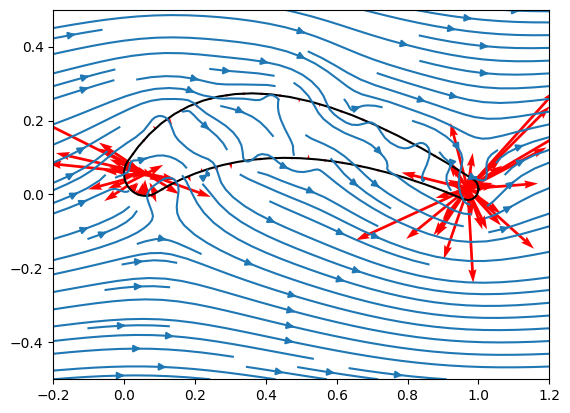

In [ ]:
plt.plot(x,y, color='black')
plt.quiver(xc,yc,
           projection*nx, projection*ny,
           color='red')
plt.streamplot(X,Y, ux,uy)